# Bản đồ không có điểm thưởng

In [2]:
%cd ../../source

/home/hiraki/source/IntroAI/Project01/source


In [3]:
from Graph import Graph
from searching_algorithms import *
from heuristic_func import euclide_heuristic, manhattan_heuristic

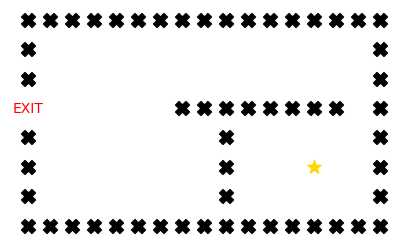

Starting point (x, y) = (5, 13)
Ending point (x, y) = (3, 0)


In [4]:
g1 = Graph('testcases/nobonus1.txt')
g1.visualize()

In [15]:
# Hàm client để chạy thuật toán tìm kiếm
def run_search_nobonus(g: Graph, algorithm, heuristic=None, figsize=(5, 3)):
    # g: đồ thị được đọc vào 
    # algorithm: con trỏ đến hàm tìm kiếm cần chạy
    g.clear()
    if heuristic:
        algorithm(g, heuristic)
    else:
        algorithm(g)
    visited, path, cost = g.get_visited()
    g.visualize(path, visited=visited, figsize=figsize)
    print('Cost:', cost)

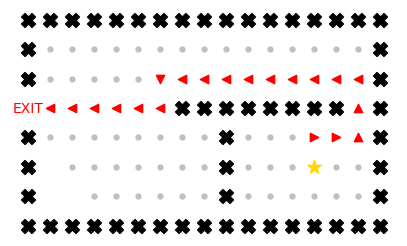

Starting point (x, y) = (5, 13)
Ending point (x, y) = (3, 0)
Cost: 1050


In [16]:
# Đồ thị 1, DFS
run_search_nobonus(g1, BFS)

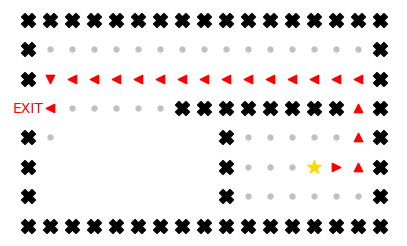

Starting point (x, y) = (5, 13)
Ending point (x, y) = (3, 0)
Cost: 1050


In [18]:
# Đồ thị 1, GBFS
run_search_nobonus(g1, DFS)

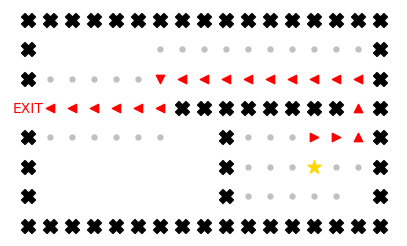

Starting point (x, y) = (5, 13)
Ending point (x, y) = (3, 0)
Cost: 1050


In [19]:
run_search_nobonus(g1, Astar, manhattan_heuristic)